<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B8%D1%85_%D0%BC%D0%B5%D1%80%D0%B5%D0%B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [1]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [3]:
inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)

In [4]:
print(inputs)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])


In [5]:
targets

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])

2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [6]:
torch.random.manual_seed(0)

In [7]:
w=torch.randn(1,3, requires_grad=True)
b=torch.randn(1, requires_grad=True)

In [8]:
w

tensor([[ 1.5410, -0.2934, -2.1788]], requires_grad=True)

In [9]:
b

tensor([0.5684], requires_grad=True)

3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [10]:
def model(inputs, w, b):
  y_pred=1/(1+torch.exp(-(inputs@w.t()+b)))
  return y_pred

In [11]:
pred_probs=model(inputs, w, b)

In [12]:
pred_probs

tensor([[4.2885e-01],
        [2.3708e-11],
        [3.2610e-14],
        [1.0000e+00],
        [9.0073e-33]], grad_fn=<MulBackward0>)

3 значення близькі до нуля і 1 значення дорівнює одиниці, посередині діапазону лише 1 з 5 значень ймовірностей.

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [13]:
def binary_cross_entropy(pred_probs, targets, epsilon=1e-7):
  preds=torch.clamp(pred_probs, min=epsilon, max=1-epsilon)
  loss=-torch.mean(targets*torch.log(preds)+(1-targets)*torch.log(1-preds))
  return loss

In [14]:
loss=binary_cross_entropy(pred_probs, targets, epsilon=1e-7)

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [15]:
loss.backward()

In [16]:
w.grad

tensor([[6.2612, 5.7466, 3.6881]])

In [17]:
b.grad

tensor([0.0858])

При збільшенні значень всіх трьох параметрів втрати збільшуються, оскільки значення градієнту додатні. Найбільше на значення функції втрат впливає перший параметр, оскільки він має найбільше абсолютне значення. Bias має невеликий вплив на функцію втрат.

**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [18]:
torch.random.manual_seed(0)
w = (torch.randn(1, 3) / 1000).requires_grad_(True)
b = (torch.randn(1) / 1000).requires_grad_(True)

In [19]:
w

tensor([[ 0.0015, -0.0003, -0.0022]], requires_grad=True)

In [20]:
b

tensor([0.0006], requires_grad=True)

In [21]:
pred_probs=model(inputs, w, b)

In [22]:
pred_probs

tensor([[0.4999],
        [0.4939],
        [0.4922],
        [0.5161],
        [0.4816]], grad_fn=<MulBackward0>)

In [23]:
loss=binary_cross_entropy(pred_probs, targets, epsilon=1e-7)

In [24]:
loss.backward()

In [25]:
w.grad

tensor([[ -7.3730, -21.3320, -11.5078]])

In [26]:
b.grad

tensor([-0.1033])

6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [27]:
inputs_mean = inputs.mean(dim=0, keepdim=True)
inputs_std = inputs.std(dim=0, keepdim=True)
normalized_inputs = (inputs - inputs_mean) / (inputs_std + 1e-7)

In [28]:
def gradient_descent(inputs, w, b, targets, learning_rate, epochs):
    losses = []
    for i in range(epochs):
        pred_probs = model(inputs, w, b)
        loss = binary_cross_entropy(pred_probs, targets, epsilon=1e-7)
        loss.backward()

        with torch.no_grad():
            new_b = b - b.grad * learning_rate
            new_w = w - w.grad * learning_rate
            b.data.copy_(new_b.data)
            w.data.copy_(new_w.data)

        w.grad.zero_()
        b.grad.zero_()

        losses.append(loss.item())
    return pred_probs, losses

In [29]:
pred_probs, losses=gradient_descent(normalized_inputs, w, b, targets, learning_rate=0.1, epochs=1000)

In [30]:
from matplotlib import pyplot as plt

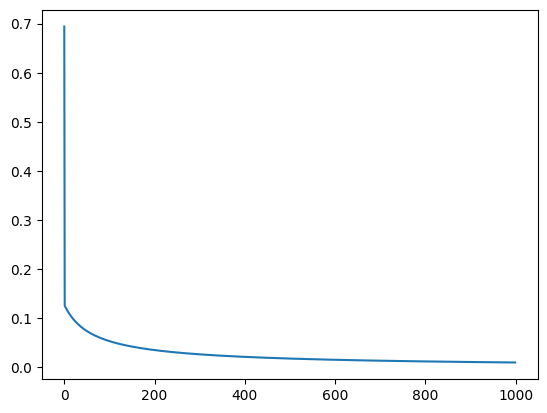

In [31]:
plt.plot(losses);

In [32]:
pred_probs

tensor([[0.0163],
        [0.9803],
        [0.9984],
        [0.0026],
        [0.9912]], grad_fn=<MulBackward0>)

Передбачення точні, модель правильно визначила всі мітки класів.

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [33]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [34]:
inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)
train_ds=TensorDataset(inputs, targets)
train_ds[:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[0.],
         [1.],
         [1.]]))

8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [35]:
batch_size=5
dl_set=DataLoader(train_ds, batch_size=batch_size, shuffle=True)
next(iter(dl_set))

[tensor([[ 87., 134.,  58.],
         [ 69.,  96.,  70.],
         [ 69.,  96.,  70.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.]])]

9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [36]:
class Logreg(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1=torch.nn.Linear(3,10)
    self.act1=torch.nn.Sigmoid()
    self.linear2=torch.nn.Linear(10,1)
    self.act2=torch.nn.Sigmoid()

  def forward(self,x):
    x=self.linear1(x)
    x=self.act1(x)
    x=self.linear2(x)
    x=self.act2(x)
    return x

In [37]:
model=Logreg()

10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [38]:
opt=torch.optim.SGD(model.parameters())
loss_fn=torch.nn.functional.binary_cross_entropy

In [39]:
pred=model(inputs)

In [40]:
loss=loss_fn(pred, targets)

In [41]:
pred

tensor([[0.4637],
        [0.4825],
        [0.4450],
        [0.4654],
        [0.4417],
        [0.4637],
        [0.4825],
        [0.4450],
        [0.4654],
        [0.4417],
        [0.4637],
        [0.4825],
        [0.4450],
        [0.4654],
        [0.4417]], grad_fn=<SigmoidBackward0>)

Модель не навчилась, оскільки всі зразки віднесла до класу 0.

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [42]:
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        total_loss = 0
        preds=[]

        for xb, yb in train_dl:
            pred = model(xb)

            loss = loss_fn(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

            total_loss += loss.item()
            preds.append([round(i.item()) for i in pred])

        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses,preds

In [43]:
losses, pred=fit_return_loss(1000, model, loss_fn, opt, dl_set)

Epoch [10/1000], Loss: 0.7150
Epoch [20/1000], Loss: 0.7100
Epoch [30/1000], Loss: 0.7057
Epoch [40/1000], Loss: 0.7004
Epoch [50/1000], Loss: 0.6964
Epoch [60/1000], Loss: 0.6931
Epoch [70/1000], Loss: 0.6894
Epoch [80/1000], Loss: 0.6864
Epoch [90/1000], Loss: 0.6833
Epoch [100/1000], Loss: 0.6801
Epoch [110/1000], Loss: 0.6775
Epoch [120/1000], Loss: 0.6753
Epoch [130/1000], Loss: 0.6728
Epoch [140/1000], Loss: 0.6710
Epoch [150/1000], Loss: 0.6686
Epoch [160/1000], Loss: 0.6669
Epoch [170/1000], Loss: 0.6651
Epoch [180/1000], Loss: 0.6638
Epoch [190/1000], Loss: 0.6622
Epoch [200/1000], Loss: 0.6605
Epoch [210/1000], Loss: 0.6591
Epoch [220/1000], Loss: 0.6576
Epoch [230/1000], Loss: 0.6564
Epoch [240/1000], Loss: 0.6556
Epoch [250/1000], Loss: 0.6541
Epoch [260/1000], Loss: 0.6530
Epoch [270/1000], Loss: 0.6519
Epoch [280/1000], Loss: 0.6509
Epoch [290/1000], Loss: 0.6502
Epoch [300/1000], Loss: 0.6491
Epoch [310/1000], Loss: 0.6486
Epoch [320/1000], Loss: 0.6473
Epoch [330/1000],

In [44]:
pred

[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]

In [45]:
targets

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])

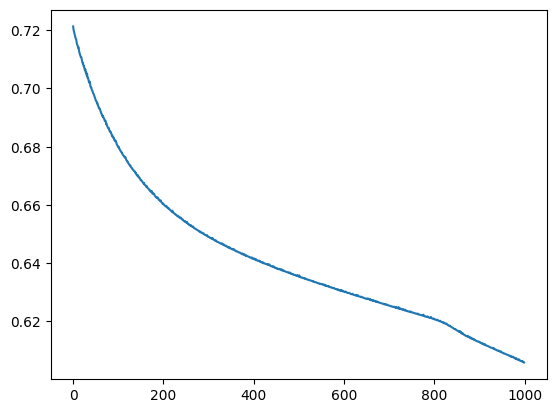

In [46]:
plt.plot(losses)

Модель все ще багато помиляється, але тепер менше, оскільки віднесла всі екземпляри до класу 1 та помилилась в 6 з 15 випадків. Значення втрат зменшується повільно.